# Tarea 2
### Aquino Chapa Martha Abril
Hecho en Python 🐍

In [ ]:
#importamos las paqueterías
from pylab import *
import random
from numpy import array
import math

#### 1. En clase vimos la forma de hacer la integral numérica en la que se aproxima la integral de una función de la siguiente manera $$ \int_{x_i-h}^{x_i+h}f(x)dx=\frac{f(x_i-1)+4f(x_i)+f(x_i+1)}{3}h+\mathcal{O}(h^{5})$$
donde se desprecian los términos $\mathcal{O}$. Calcule las integrales de las siguientes funciones para una malla uniforme:

* $$\int_0^{5}f(x)dx$$
* $$ \int_{-5}^{5}f^{2}(x)dx$$
* $$ \int_{0.5}^{5}g(x)dx$$

Donde $f(x)=e^{-x^{2}}\sin(x)$ y $g(x)=-{\frac{2}{x^{6}}}+{\frac{1}{x^{12}}}$. Muestre que ha podido integrar hasta una precisión de $10^{-4}$.

In [2]:
#Definimos la función integral del ejercicio 
def int1(f,x):
    #Definimos el espacio entre dos puntos contiguos en la malla
    h = x[2] - x[1]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integral = 0 
    #Definimos la condiciones en las cuales se evaluará nuestra integral:
    #Si la malla en la cual vamos a integrar es par, pedimos que saque la integral a partir de segundo elemento
    if mod(len(f),2) == 0:
        inicio = 2
    #Si el número de puntos en la malla no es par le pedimos que inicie un elemento despues del primer elemento en la malla
    elif mod(len(f),2) == 1:
        inicio = 1
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 2 puntos
    for i in range(inicio,len(f)-1,2):
        integral += f[i+1] + 4*f[i] + f[i-1]
    integral = integral*(h/3)
    #la integral en la frontera es
    if mod(len(f),2) == 0:
        integral += (h/48)*(23*f[0] + 26*f[1] - 4*f[2] + 6*f[3] -3*f[4])
    return integral

Obtenemos la integral de f(x) de 0 a 5:

In [3]:
# Obtenemos entonces la integral de f(x):
#Definimos la malla
x=linspace(0,5,107)
f=exp(-(x*x))*sin(10*x)
print('La integral de f(x) es: ',int1(f,x))
#Dicha integral, hecha en wolfram tiene el valor de :
m=0.1021340744237976138708054220876899
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-int1(f,x)))

La integral de f(x) es:  0.10216413209752144
La precisión de la integral es:  3.0057673723826728e-05


Ahora obtenemos un algoritmo para la integral de $f^{2}(x)$, para ello en la funcion int1, hacemos el cambio de $f(x)\rightarrow f^{2}(x)$.

In [4]:
# Obteniendo ahora el algoritmo para la segunda integral, es lo mismo pero en este caso tendremos f^2
#Para ello hacemos el cambio de variable de f a f^2
#Definimos la función integral del ejercicio 1a
def int2(f,x):
    #Definimos el espacio entre dos puntos contiguos en la malla
    h = x[2] - x[1]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integral = 0 
    #Definimos la condiciones en las cuales se evaluará nuestra integral:
    #Si la malla en la cual vamos a integrar es par, pedimos que saque la integral a partir de tercer elemento
    if mod(len(f),2) == 0:
        inicio = 2
    #Si el número de puntos en la malla no es par le pedimos que inicie un elemento despues del primero en la malla
    elif mod(len(f),2) == 1:
        inicio = 1
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 2 puntos
    for i in range(inicio,len(f)-1,2):
        integral += f[i+1]*f[i+1] + 4*f[i]*f[i] + f[i-1]*f[i-1]
    integral = integral*(h/3)
    # punto inicial si se tiene un arreglo par
    if mod(len(f),2) == 0:
        integral += (h/48)*(23*f[0]*f[0] + 26*f[1]*f[1] - 4*f[2]*f[2] + 6*f[3]*f[3] -3*f[4]*f[4])
    return integral

Obtenemos la integral de $f^{2}(x)$

In [5]:
# Obtenemos entonces la integral de f(x):
#Definimos la malla
x=linspace(-5,5,48)
f=exp(-(x*x))*sin(10*x)
print(r'La integral de $f^{2}(x)$ es ', int2(f,x))
#Dicha integral, hecha en wolfram tiene el valor de :
m=0.6266570686577501256038175123698260447534631408887006665615074330
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-int2(f,x)))

La integral de $f^{2}(x)$ es  0.6266644078503681
La precisión de la integral es:  7.339192617972223e-06


Obtenemos ahora la integral de g(x), donde usaremos la función int1.

In [6]:
#Notemos que el código para la primera integral nos sirve para el inciso c
x=linspace(0.5,5,1051)
f=-(2/x**6)+(1/x**12)
m=173.382
print("La integral de g(x) es ", int1(f,x))
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-int1(f,x)))

La integral de g(x) es  173.38207938379168
La precisión de la integral es:  7.938379167171661e-05


#### 2. Haga una función que implemente la integral numérica utilizando la regla de ''Simpson $\frac{3}{8}$'' dada por la relación: 
$$\int_{x_i}^{x_i+3}=\frac{3h}{8}\left(  f(x_i)+3f(x_{i+1})+3f(x_{i+2})+f(x_{i+3})\right)+\mathcal{O}(h^{5})$$

#### donde se desprecian los términos $\mathcal{O}(h^{5}$. Utilice este algoritmo para obtener lasa integrales del problema anterior con una precisión de $10^{-4}$.



In [7]:
#Definimos la función que nos calcule la integral de Simpson
def intSimpson(f,x):
    #Definimos el espacio entre dos puntos contiguos en la malla
    h = x[2] - x[1]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integral = 0 
    #Definimos la condiciones en las cuales se evaluará nuestra integral:
    #Si la malla,menos el primer punto, en la cual vamos a integrar es divisible entre 3, pedimos que saque la integral a partir de primer elemento
    if mod(len(f)-1,3) == 0:
        inicio = 0
    #Si la malla,menos el primer punto,el residuo de dividir entre 3 es 1, pedimos que saque la integral del a partir del segundo elemento   
    if mod(len(f)-1,3) == 1:
        inicio = 1
    #Si la malla,menos el primer punto,el residuo de dividir entre 3 es 2, pedimos que saque la integral del a partir del tercer elemento       
    elif mod(len(f)-1,3) == 2:
        inicio = 2
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 3 puntos
    for i in range(inicio,len(f)-4 ,3):
        integral += f[i]+3*f[i+1]+3*f[i+2]+f[i+3]
    integral = integral*(3*h/8)
    
    # Si nos sobran tres puntos, podemos usar el algoritmo del ejercicio 1.
    if mod(len(f)-1,3) == 2:
        integral += (f[0] + 4*f[1] + f[2])*(h/3)
        
    #Si solo tenemos dos puntos en la frontera, le sumamos el siguiente valor a la integral 
    if mod(len(f)-1,3) == 1:
        integral += (h/48)*(23*f[0]+ 26*f[1] - 4*f[2] + 6*f[3] -3*f[4])
    return integral

Ya que tenemos el algoritmo para la integral de Simpson, usemosla para obtener la integral de las funciones del ejercicio 1.
Iniciamos con $f(x)$

In [8]:
x=linspace(0,5,100)
f=exp(-(x*x))*sin(10*x)
print(r"La integral de Simpson $f(x)$ es ", intSimpson(f,x))
#Dicha integral, hecha en wolfram tiene el valor de :
m=0.1021340744237976138708054220876899
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intSimpson(f,x)))

La integral de Simpson $f(x)$ es  0.10222669406705334
La precisión de la integral es:  9.261964325572858e-05


Debido a que queremos la integral de una función al cuadrado, la función intSimpson no nos sirve, a menos que queramos elevar nuestra función al cuadrado, pero aveces somos flojos, entonces modificamos el código de la función anterior intercambiando $f$ por $f^{2}$ para solo meter la función y ahorrar tiempo :D

In [10]:
#Definimos la función que nos calcule la integral de Simpson de una función f^2
def intSimpson2(f,x):
    #Definimos el espacio entre dos puntos contiguos en la malla
    h = x[2] - x[1]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integral = 0 
    #Definimos la condiciones en las cuales se evaluará nuestra integral:
    #Si la malla,menos el primer punto, en la cual vamos a integrar es divisible entre 3, pedimos que saque la integral a partir de primer elemento
    if mod(len(f)-1,3) == 0:
        inicio = 0
    #Si la malla,menos el primer punto,el residuo de dividir entre 3 es 1, pedimos que saque la integral del a partir del segundo elemento   
    if mod(len(f)-1,3) == 1:
        inicio = 1
    #Si la malla,menos el primer punto,el residuo de dividir entre 3 es 2, pedimos que saque la integral del a partir del tercer elemento       
    elif mod(len(f)-1,3) == 2:
        inicio = 2
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 2 puntos
    for i in range(inicio,len(f)-4 ,3):
        integral += f[i]*f[i]+3*f[i+1]*f[i+1]+3*f[i+2]*f[i+2]+f[i+3]*f[i+3]
    integral = integral*(3*h/8)
    # Si nos sobran tres puntos, podemos usar el algoritmo del ejercicio 1.
    if mod(len(f)-1,3) == 2:
        integral += (f[0]*f[0] + 4*f[1]*f[1] + f[2]*f[2])*(h/3)
        
    #Si solo tenemos dos puntos en la frontera, le sumamos el siguiente valor a la integral 
    if mod(len(f)-1,3) == 1:
        integral += (h/48)*(23*f[0]*f[0] + 26*f[1]*f[1] - 4*f[2]*f[2] + 6*f[3]*f[3] -3*f[4]*f[4])
    return integral

Obtenemos la integral de $f^{2}$

In [11]:
#Definimos la malla
x=linspace(-5,5,140)
f=exp(-(x*x))*sin(10*x)
print("La integral de Simpson de f^2 es ", intSimpson2(f,x))
#Dicha integral, hecha en wolfram tiene el valor de :
m=0.6266570686577501256038175123698260447534631408887006665615074330
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intSimpson2(f,x)))

La integral de Simpson de f^2 es  0.6266582861443991
La precisión de la integral es:  1.2174866489411684e-06


Ahora obtenemos la integral de la función g utilizando la función intSimp

In [12]:
#Notemos que el código para la primera integral nos sirve para el inciso c
x=linspace(0.5,5,10000)
f=-(2/x**6)+(1/x**12)
m=173.382
print("La integral de g(x) es ", intSimpson(f,x))
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intSimpson(f,x)))

La integral de g(x) es  173.38194638945512
La precisión de la integral es:  5.3610544881621536e-05


### 3. Haga una función que implemente la integral númerica utilizando la regla de ''Boole'' dada por la relación 
$$\int_{x_i}^{x_{i+4}}f(x)={\frac{2h}{48}}(7f(x_i)+32f(x_{i+1})+12f(x_{i+2})+32f(x_{i+3})+7f(x_{i+4}))+\mathcal{O}(h^{7}) $$
### donde se desprecian los términos $\mathcal{O}(h^{7})$. Utilice este algoritmo para obtener las integrales del problema anterior con una precisión de $10^{-4}$.

In [13]:
#Definimos la función que nos calcule la integral de Boole
def intBoole(f,x):
    #Definimos el espacio entre dos puntos contiguos en la malla
    h = x[2] - x[1]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integral = 0 
    #Definimos la condiciones en las cuales se evaluará nuestra integral:
    #Si la malla, menos un punto, en la cual vamos a integrar es divisible entre 4, pedimos que saque la integral del a partir del primer elemento
    if mod(len(f)-1,4) == 0:
        inicio = 0
    #Si el residuo de el num de puntos en la malla,menos 1, entre 4 es 1, pedimos que saque la integral del a partir del segundo elemento de la malla
    if mod(len(f)-1,4) == 1:
        inicio = 1
        
    #Si el residuo de el num de puntos en la malla,menos 1, entre 4, es 2, pedimos que saque la integral del a partir del tercer elemento de la malla
    if mod(len(f)-1,4) == 2:
        inicio = 2
        
    #Si el residuo de el num de puntos en la malla,menos 1, entre 4, es 3 pedimos que saque la integral del a partir del cuarto elemento de la malla
    if mod(len(f)-1,4) == 3:
        inicio = 3
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 4 puntos
    for i in range(inicio,len(f)-4 ,4):
        integral += 7*f[i]+32*f[i+1]+12*f[i+2]+32*f[i+3]+7*f[i+4]
    integral = integral*(2*h/45)
    #Definimos la integral correspondiente a los puntos frontera para sumarlos a la integral total.
    
    if mod(len(f)-1,4) == 3:
        integral +=(f[i]+3*f[i+1]+3*f[i+2]+f[i+3])*(3*h/8)
    
    if mod(len(f)-1,4) == 2:
        integral += ((f[0] + 4*f[1] + f[2]))*(h/3)
        
    
    if mod(len(f)-1,4) == 1:
        integral += (h/48)*(23*f[0]+ 26*f[1] - 4*f[2] + 6*f[3] -3*f[4])
        #integral += (h/48)*(23*f[0]*f[0] + 26*f[1]*f[1] - 4*f[2]*f[2] + 6*f[3]*f[3] -3*f[4]*f[4])
    return integral

In [14]:
#Definimos la malla
x=linspace(0,5,73)
f=exp(-(x*x))*sin(10*x)
print(r"La integral de f(x) es ", intBoole(f,x))
#Dicha integral, hecha en wolfram tiene el valor de :
#m=integrate(cos(x), (x,0,pi/2.0))
m=0.1021340744237976138708054220876899
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intBoole(f,x)))

La integral de f(x) es  0.102093434309707
La precisión de la integral es:  4.064011409060653e-05


Modificamos la función intBoole para obtener la integral de una función $f^{2}$

In [15]:
#Definimos la función que nos calcule la integral de Boole para una función f^2
#Para ello solo cambiaremos en la función intBoole f por f*f
def intBoole2(f,x):
    #Definimos el espacio entre dos puntos contiguos en la malla
    h = x[2] - x[1]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integral = 0 
    #Definimos la condiciones en las cuales se evaluará nuestra integral:
    if mod(len(f)-1,4) == 0:
        inicio = 0
        
    if mod(len(f)-1,4) == 1:
        inicio = 1
        
    if mod(len(f)-1,4) == 2:
        inicio = 2
    
    if mod(len(f)-1,4) == 3:
        inicio = 3
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 2 puntos
    for i in range(inicio,len(f)-4 ,4):
        integral += 7*f[i]*f[i]+32*f[i+1]*f[i+1]+12*f[i+2]*f[i+2]+32*f[i+3]*f[i+3]+7*f[i+4]*f[i+4]
    integral = integral*(2*h/45)
    
    if mod(len(f)-1,4) == 3:
        integral +=(f[i]*f[i]+3*f[i+1]*f[i+1]+3*f[i+2]*f[i+2]+f[i+3]*f[i+3])*(3*h/8)
    
    if mod(len(f)-1,4) == 2:
        integral += ((f[0]*f[0] + 4*f[1]*f[1] + f[2]*f[2]))*(h/3)
        
    
    if mod(len(f)-1,4) == 1:
        integral += (h/48)*(23*f[0]*f[0]+ 26*f[1]*f[1] - 4*f[2]*f[2] + 6*f[3]*f[3] -3*f[4]*f[4])
    return integral

Obtenemos la integral para $f^{2}(x)$

In [16]:
#Definimos la malla
x=linspace(-5,5,80)
f=exp(-(x*x))*sin(10*x)
print("La integral de f^2(x) ", intBoole2(f,x))
#Dicha integral, hecha en wolfram tiene el valor de :
m=0.6266570686577501256038175123698260447534631408887006665615074330
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intBoole2(f,x)))

La integral de f^2(x)  0.6266497344529481
La precisión de la integral es:  7.334204802034172e-06


Ahora obtenemos la integral usando la función intBoole

In [17]:
#Notemos que el código para la primera integral nos sirve para el inciso c
x=linspace(0.5,5,1001)
f=-(2/x**6)+(1/x**12)
m=173.382
print("La integral de g(x) es ", intBoole(f,x))
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intBoole(f,x)))

La integral de g(x) es  173.3819473696758
La precisión de la integral es:  5.263032420543823e-05


### 4.Utilizando la integral del problema 1(a), realicce una tabla en la que se muestre la convergencia de los 3 algoritmos anteriores comenzando con h=0.25 hasta h=00001. La tabla debe tener por lo menos 30 diferentes h's. Obtenga el número de puntos en la malla para cada h y haga una gráfica en la que se muestre la convergencia de los 3 algoritmos, Números de puntos vs valor de la integral.

In [18]:
#Definimos el intervalo de h's que queremos cubrir
h = linspace(0.001,0.25,30)
print('{:^20}{:^20}{:^20}{:^20}'.format('h','Integral1','Int. Simpson','Int.Boole'))
for i in range(len(h)):
    #Tomamos el elmento i de las h's
    m=h[i]
    #Obtenemos el número de puntos en la malla cuya distancia entre dos puntos consecuentes es h
    num=int(5/h[i])
    #Definimos la malla donde integraremos
    x = linspace(0,5,num)
    #Definimos la función f(x)
    f = exp(-(x*x))*sin(10*x)
    #Obtenemos la integral de f(x) con los tres diferentes algoritmos
    #Con la función del ejercicio 1
    integral1=int1(f,x)
    #Con la función del ejercicio 2
    integral2=intSimpson(f,x)
    #Con la función del ejercicio 3
    integral3=intBoole(f,x)
    #Inprimimos cada uno de los valores de la integral con la respectiva h
    print('{:^20.10}{:^20.10}{:^20.10}{:^20.10}'.format(m,integral1,integral2,integral3))
    

         h               Integral1          Int. Simpson         Int.Boole      
       0.001            0.1021340746        0.1021340746         0.10208906     
   0.009586206897       0.1021341248        0.1021356692        0.1021340742    
   0.01817241379        0.1021347304        0.102153813         0.1021341146    
   0.02675862069        0.1022179266        0.1021406341        0.1022147844    
   0.03534482759        0.1021438235        0.1021529255        0.1021334985    
   0.04393103448        0.1021581129         0.10263214         0.1021317657    
   0.05251724138        0.1021830899        0.1029567347        0.1021595482    
   0.06110344828        0.1022289353        0.1022598677        0.1021140294    
   0.06968965517        0.1022986983        0.1034991111        0.1022901761    
   0.07827586207        0.1024070885        0.1023468474        0.1024696028    
   0.08686206897        0.1025533202        0.1023397538        0.101885252     
   0.09544827586        0.10

Obteniendo ahora las graficas de convergencia para cada algoritmo, iniciando por el correspondiente al ejercicio 1:

In [39]:
#Definimos nuestro espacio de h's, distancia entre dos puntos consecutivos
h = linspace(0.25,0.001,30)
#Definimos los arreglos donde iremos ingresando los valores de la integral con las diferentes h's
integral_1 = np.zeros(len(h))
integral_2 = np.zeros(len(h))
integral_3 = np.zeros(len(h))
#Definimos un arreglo para anexar el valor de Wolfram de la integral
convergencia = np.zeros(len(h))
#Hacemos un último arreglo para anexar el número de puntos correspondientes al espacio de lasa h's
num1=np.zeros(len(h))
for i in range(len(h)):
    #Obtenemos el num de puntos en malla con distancia entre sus puntos h[i] con los que definiremos la malla de la integral
    num1[i]=int(5/h[i])
    #Obtenemos el num de puntos en malla con distancia entre sus puntos h[i] para nuestro arreglo de número de puntos
    num=int(5/h[i])
    #Definimos la malla donde integraremos
    x = linspace(0,5,num)
    #Definimos la función f(x)
    f= exp(-(x*x))*sin(10*x)
    #Obtenemos las integrales correspondientes a num de puntos en la malla 
    integral_1[i] = int1(f,x)
    integral_2[i]=intSimpson(f,x)
    integral_3[i]=intBoole(f,x)
    convergencia[i]=0.1021340744237976138708054220876899

Obtenemos las gráficas de convergencia, donde la línea horizontal marca el valor de la integral según Wolfram.
La convergencia para la integral del primer algoritmo:

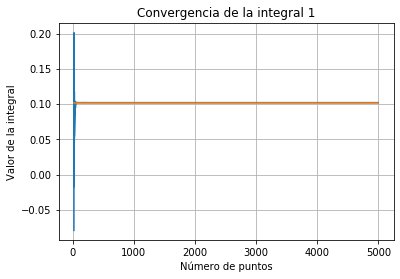

(Text(0.5, 17.700000000000003, 'Número de puntos'),
 Text(17.200000000000003, 0.5, 'Valor de la integral'),
 None,
 None)

In [40]:
plot(num1,integral_1)
plot(num1,convergencia )
title("Convergencia de la integral 1")
xlabel("Número de puntos"),ylabel("Valor de la integral"),grid(),show()

La convergencia para el algoritmo de la integral de Simpson:

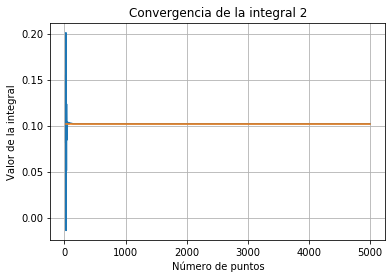

(Text(0.5, 1, 'Convergencia de la integral 2'),
 Text(0.5, 17.700000000000003, 'Número de puntos'),
 Text(17.200000000000003, 0.5, 'Valor de la integral'),
 None,
 None)

In [41]:
plot(num1,integral_2)
plot(num1,convergencia)
title("Convergencia de la integral 2"),xlabel("Número de puntos"),ylabel("Valor de la integral"),grid(),show()

Convergencia del algoritmo de la integral con la relación de Boole.

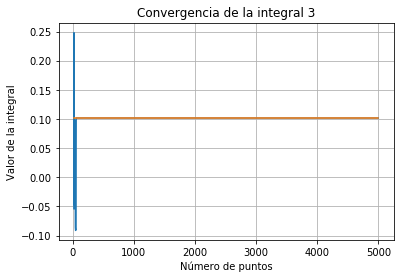

(Text(0.5, 1, 'Convergencia de la integral 3'),
 Text(0.5, 17.700000000000003, 'Número de puntos'),
 Text(17.200000000000003, 0.5, 'Valor de la integral'),
 None,
 None)

In [42]:
plot(num1,integral_3)
plot(num1,convergencia)
title("Convergencia de la integral 3"),xlabel("Número de puntos"),ylabel("Valor de la integral"),grid(),show()

Apreciamos que las integrales no convergen de una manera agraciada con pequeños puntos en la malla, sin embargo, conforme se aumenta el número de puntos en la malla la integral converge al valor de la integral obtenido con Wolfram.
Sin embargo no converge de una manera suave, ya que con pocos puntos en la malla oscila incluso entre valores negativos. También esperaba que la convergencia de la integral fuera una curva suave similar a un polinomio o un logaritmo, sin embargo considero que esto se podría deber a que la función f(x) no es integrable, que el algoritmo esté mal, o incluso que la relación matemática de la integral númerica no se adapte bien a las fronteras. Por ejemplo si tomamos la convergencia de la integral con la relación de Simpson:

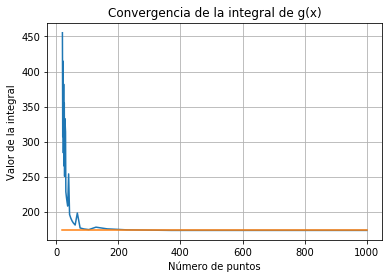

(Text(0.5, 1, 'Convergencia de la integral de g(x)'),
 Text(0.5, 17.700000000000003, 'Número de puntos'),
 Text(17.200000000000003, 0.5, 'Valor de la integral'),
 None,
 None)

In [51]:
#Definimos nuestro espacio de h's, distancia entre dos puntos consecutivos
h = linspace(0.25,0.005,30)
#Definimos los arreglos donde iremos ingresando los valores de la integral con las diferentes h's
integral_g = np.zeros(len(h))
#Definimos un arreglo para anexar el valor de Wolfram de la integral
convergencia = np.zeros(len(h))
#Hacemos un último arreglo para anexar el número de puntos correspondientes al espacio de lasa h's
num1=np.zeros(len(h))
for i in range(len(h)):
    #Obtenemos el num de puntos en malla con distancia entre sus puntos h[i] con los que definiremos la malla de la integral
    num1[i]=int(5/h[i])
    #Obtenemos el num de puntos en malla con distancia entre sus puntos h[i] para nuestro arreglo de número de puntos
    num=int(5/h[i])
    #Definimos la malla donde integraremos
    x = linspace(0.5,5,num)
    #Definimos la función f(x)
    f= -(2/x**6)+(1/x**12)
    #Obtenemos las integrales correspondientes a num de puntos en la malla 
    integral_g[i]=int1(f,x)
    convergencia[i]=173.382
plot(num1,integral_g)
plot(num1,convergencia)
title("Convergencia de la integral de g(x)"),xlabel("Número de puntos"),ylabel("Valor de la integral"),grid(),show()

Vemos que la convergencia de la integral de Simpson, ya no oscila de gran manera, sin embargo ahora toma valores muy grandes con pocos puntos. Así que en conclusión, si uno deseará encontrar la integral de una función con los algoritmos anteriormente presentados deberá tomar más puntos en su malla para tener mayor aproximación con la integral "real".